## Assignment 4 sample solution

This assignment asks you to use resources at hand to apply module 6 - Linear Regression to several sets of data.

## Learning Outcomes

- Exploratory analysis for regression
- Understand difference between linear and non-linear models
- Carry out OLS regression model
- Evaluate model

### Question 1

* For each data set in Assignment4_linear_regression_data.xlsx:

- Create a scatter plot and visually decide if a linear model is appropriate (a matrix scatter plot will would be most efficient).

* If the relation is not linear, transform the data accordingly. 
 - Try logarithm, exponential, square root, square, etc., for X and/or Y until you see a linear relation.  You only need to report what is the transformation chosen, not all the attempts. 
 __Note:__  most of the time, you can guess visually. A systematic way is to create a matrix scatter plot of the different transformations.  A generic way we did not cover is to use a Box-Cox transformation. 
 
* Create an OLS model for the original and transformed data if required. 
 - Evaluate if the OLS assumptions are met: normality of errors centered around zero, equal variance, etc..., for the original data and transformed data if appropriate. 

 - Comment how the transformation impacted the different assumptions. (This should be done only by looking at the output diagnostic charts created by the software)
 - If datasets have outliers, remove the outliers and see the effect in the model (slope, intercept and R-square)



The output of the assignment should be: 

- OLS full report for the original and transformed data if appropriate (only two datasets should need transformation).

- A short comment on the validity of the linear assumptions for the original and transformed data set when appropriate (it should not need to be longer than a couple of sentences).

- An interpretation of the slope and intercept in relation to the original data, i.e. if the model is linear [intercept value] is the expected value when the independent variable is zero, etc.).  If the model is not linear, you need to transform the equation back to its original form.  

Check out the following if you need further guidance:
http://www.bzst.com/2009/09/interpreting-log-transformed-variables.html

https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqhow-do-i-interpret-a-regression-model-when-some-variables-are-log-transformed/

https://stats.idre.ucla.edu/sas/faq/how-can-i-interpret-log-transformed-variables-in-terms-of-percent-change-in-linear-regression/

https://stats.stackexchange.com/questions/266722/interpretation-of-linear-regression-results-where-dependent-variable-is-transfor

- If the dataset have outliers, determine if the outlier have leverage or not by comparing the OLS with and without the outlier.

In [47]:
# import libraries

import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import sklearn.linear_model
import scipy, scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import scatter
from statsmodels.graphics.regressionplots import plot_regress_exog, plot_fit, plot_leverage_resid2, influence_plot
%matplotlib inline

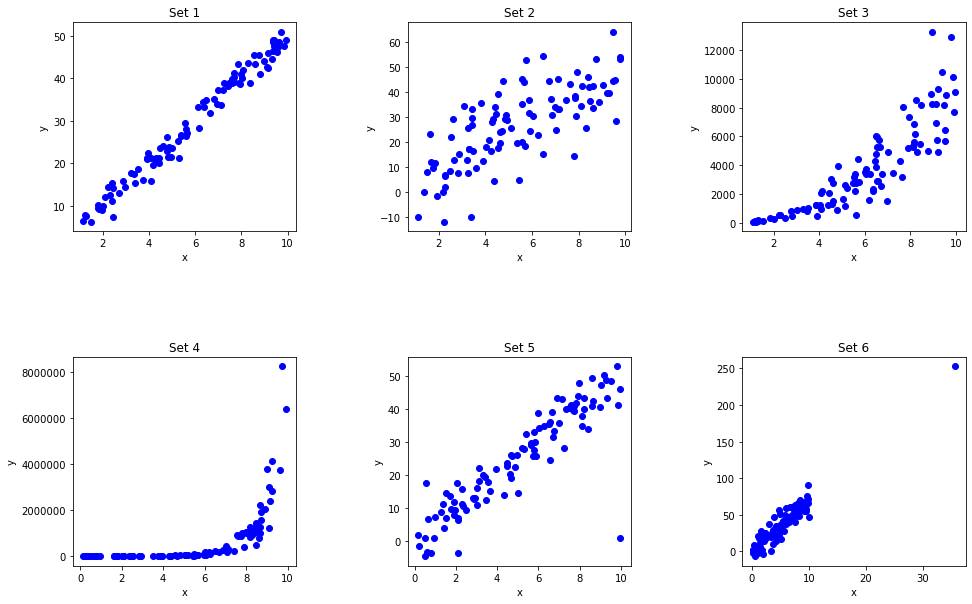

In [48]:
df_name = pd.ExcelFile('Assignment4_linear_regresion_data.xlsx')
x_list = df_name.sheet_names
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(16)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.6)
for i in range(len(x_list)):
    name = 'df____'+str(i)
    name = df_name.parse(x_list[i])
    name.columns = ['y','x']
    plot_num= 231+i
    ax1 = fig.add_subplot(plot_num)
    ax1.scatter(name.x, name.y, marker='o',color='blue',label='Set 1')
    ax1.set_ylabel('y')
    ax1.set_xlabel('x')
    ax1.set_title('Set '+ str(i+1))

* Set 1. Linear model is appropriate. No outliers, all point follow linear trend.

* Set 2. Linear model is also most likely here. Data are scattered, but still follow linear trend. No ouliers.

* Set 3. The linear model is not appropriate here. Data transformation will be applied. No ouliers.

* Set 4. The linear model is not appropriate. Points in the top-right corner seem to be outlier only against linear fit. Data transformation will be applied. No outliers.

* Set 5. In this case linear model seems perfectly acceptable. Few outliers present.

* Set 6. Linear model give very good fit in this case. One point is distinct from the rest, but seems perfectly fitted with linear model. 

It is assumed that the data is independent for all the datasets.

In [49]:
#Load data from excel file into Pandas DataFrames
data_file = 'Assignment4_linear_regresion_data.xlsx'
df_set1 = pd.read_excel(data_file,sheet_name="Set 1")

sheet_name = 'Set 2'
df_set2 = pd.read_excel(data_file,sheet_name='Set 2')

sheet_name = 'Set 3'
df_set3 = pd.read_excel(data_file,sheet_name='Set 3')

sheet_name = 'Set 4'
df_set4 = pd.read_excel(data_file,sheet_name='Set 4')

sheet_name = 'Set 5'
df_set5 = pd.read_excel(data_file,sheet_name='Set 5')

sheet_name = 'Set 6'
df_set6 = pd.read_excel(data_file,sheet_name='Set 6')

## Dataset 1

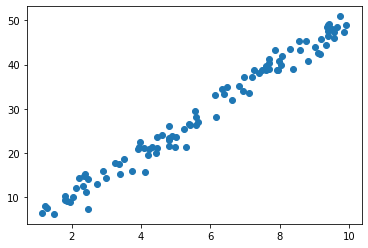

In [50]:
plt.scatter(x=df_set1["x"], y=df_set1["y"])

In [51]:
reg_set_1 = ols('y ~ x', data = df_set1).fit()
reg_set_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     4579.
Date:                Tue, 04 Aug 2020   Prob (F-statistic):           4.47e-84
Time:                        17:14:47   Log-Likelihood:                -206.03
No. Observations:                 100   AIC:                             416.1
Df Residuals:                      98   BIC:                             421.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2381      0.469      0.508      0.613      -0.693       1.169
x              4.9843      0.074     67.669      0.000       4.838       5.130
==============================================================================
Omnibus:                        4.971   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.083   Jarque-Bera (JB):                4.783
Skew:                          -0.536   Prob(JB):                       0.0915
Kurtosis:                       2.988   Cond. No.                         15.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

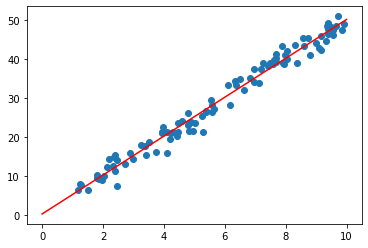

In [52]:
t = np.linspace(0, 10, 100)
plt.scatter(x=df_set1["x"], y=df_set1["y"])
plt.plot(t, reg_set_1.params[0] + reg_set_1.params[1] * t, 'r-')

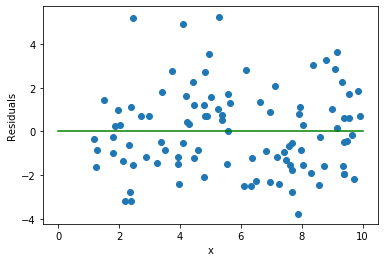

In [53]:
scatter(df_set1["x"], reg_set_1.fittedvalues - df_set1["y"])
plt.xlabel("x")
plt.ylabel("Residuals")
plt.plot([0, 10], [0, 0], 'g-')

(array([ 3.,  0.,  4.,  5.,  8., 13., 15., 11., 17., 12.,  9.,  3.]),
 array([-5.25491183, -4.50339057, -3.75186931, -3.00034805, -2.2488268 ,
        -1.49730554, -0.74578428,  0.00573697,  0.75725823,  1.50877949,
         2.26030074,  3.011822  ,  3.76334326]),
 <a list of 12 Patch objects>)

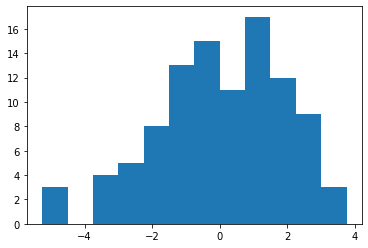

In [54]:
plt.hist(reg_set_1.resid, bins=12)

The dataset 1 was fit for linear regression model. 
Assumptions were met: 
* the residuals are approx. normally distributed, 
* variability is uniform,
* no obvious outliers.

R-squared is close to 1 and kurtosis is close to 3 (normal distribution value), but it seems that intercept might be zero.

In [55]:
# Fit without intercept

reg_set_1_no_intercept = ols('y ~ x - 1', data = df_set1).fit()
reg_set_1_no_intercept.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          2.794e+04
Date:                Tue, 04 Aug 2020   Prob (F-statistic):                   3.31e-123
Time:                        17:14:48   Log-Likelihood:                         -206.17
No. Observations:                 100   AIC:                                      414.3
Df Residuals:                      99   BIC:                                      416.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x              5.0184      0.030    167.166      0.000       4.959       5.078
==============================================================================
Omnibus:                        4.831   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.089   Jarque-Bera (JB):                4.693
Skew:                          -0.530   Prob(JB):                       0.0957
Kurtosis:                       2.947   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The fit without intercept returns even higher value of R-squared,    
and kurtosis is close to 3 indicating the normal distribution of residuals.

## Dataset 2

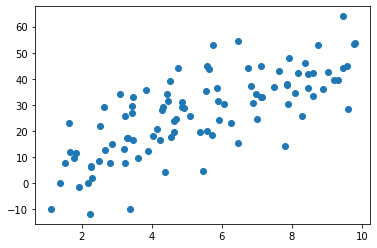

In [56]:
plt.scatter(x=df_set2["x"], y=df_set2["y"])

Linear model is also most likely here. Data are scattered, but still follow linear trend. No ouliers.

In [57]:
reg_set_2 = ols('y ~ x', data= df_set2).fit()
reg_set_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     122.4
Date:                Tue, 04 Aug 2020   Prob (F-statistic):           6.11e-19
Time:                        17:14:49   Log-Likelihood:                -375.73
No. Observations:                 100   AIC:                             755.5
Df Residuals:                      98   BIC:                             760.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0956      2.547      0.430      0.668      -3.958       6.149
x              4.7774      0.432     11.062      0.000       3.920       5.634
==============================================================================
Omnibus:                        0.254   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.881   Jarque-Bera (JB):                0.079
Skew:                          -0.065   Prob(JB):                        0.961
Kurtosis:                       3.045   Cond. No.                         14.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

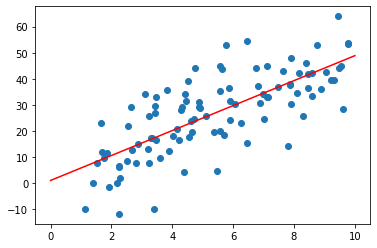

In [58]:
t = np.linspace(0, 10, 100)
plt.scatter(x=df_set2["x"], y=df_set2["y"])
plt.plot(t, reg_set_2.params[0] + reg_set_2.params[1] * t, 'r-')

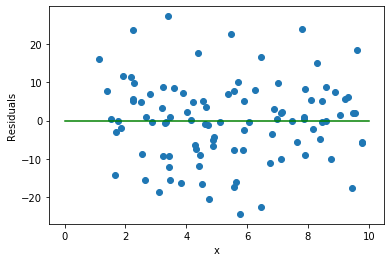

In [59]:
scatter(df_set2["x"], reg_set_2.fittedvalues - df_set2["y"])
plt.xlabel("x")
plt.ylabel("Residuals")
plt.plot([0, 10], [0, 0], 'g-')

(array([ 4.,  2.,  3., 16., 19., 23., 12.,  9.,  9.,  3.]),
 array([-27.13099985, -21.990711  , -16.85042215, -11.7101333 ,
         -6.56984445,  -1.4295556 ,   3.71073324,   8.85102209,
         13.99131094,  19.13159979,  24.27188864]),
 <a list of 10 Patch objects>)

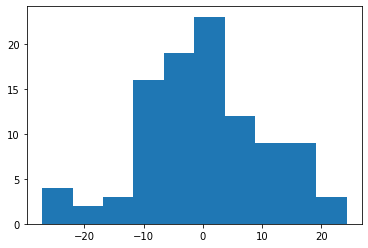

In [60]:
plt.hist(reg_set_2.resid)

The residuals are approximately normal with constant variability.

The R-squared value in not high, but other summary parameters indicate acceptable fit
and linear model explains upward trand in data.

Intercept CI includes zero, so repeat fit without intercept. 

In [61]:
reg_set_2_no_intercept = ols('y ~ x -1', data=df_set2).fit()
reg_set_2_no_intercept.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.888
Model:                            OLS   Adj. R-squared (uncentered):              0.887
Method:                 Least Squares   F-statistic:                              782.6
Date:                Tue, 04 Aug 2020   Prob (F-statistic):                    8.34e-49
Time:                        17:14:51   Log-Likelihood:                         -375.83
No. Observations:                 100   AIC:                                      753.7
Df Residuals:                      99   BIC:                                      756.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x              4.9467      0.177     27.975      0.000       4.596       5.298
==============================================================================
Omnibus:                        0.202   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.904   Jarque-Bera (JB):                0.050
Skew:                          -0.052   Prob(JB):                        0.975
Kurtosis:                       3.030   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Fit without intercept seems better, R-squared jumped to 0.888 and kurtosis close to 3 (normally distributed residuals).

## Dataset 3

The data show non-linearity and no obvious outliers.

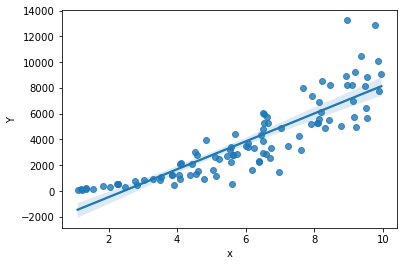

In [62]:
sns.regplot(y="Y", x="x", data=df_set3, fit_reg = True)

In [63]:
# Box-Cox transformation is used to find the most suitable transfomation
import scipy

df_set3['bc_y'],lambda_value = scipy.stats.boxcox(df_set3.Y)
lambda_value

0.3963404407119001

In [64]:
# we can proceed with Box-Cox transformed variable or apply square-root transformation
# since BC lambda is close to 0.5

# NOTE. Rounding to 0.5 is aggresive, one may try 0.4 (2/5 power)

df_set3["sqrt_y"] = np.sqrt(df_set3["Y"])

In [65]:

reg_set_3_sqrt = ols('sqrt_y ~ x', data=df_set3).fit()
reg_set_3_sqrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sqrt_y   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     588.0
Date:                Tue, 04 Aug 2020   Prob (F-statistic):           3.37e-43
Time:                        17:14:53   Log-Likelihood:                -369.26
No. Observations:                 100   AIC:                             742.5
Df Residuals:                      98   BIC:                             747.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.2001      2.612     -0.842      0.402      -7.384       2.984
x              9.7861      0.404     24.249      0.000       8.985      10.587
==============================================================================
Omnibus:                        2.926   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.232   Jarque-Bera (JB):                2.648
Skew:                          -0.150   Prob(JB):                        0.266
Kurtosis:                       3.739   Cond. No.                         17.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

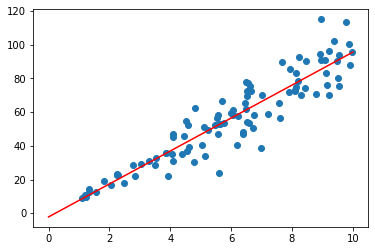

In [66]:
t = np.linspace(0, 10, 100)
plt.scatter(x=df_set3["x"], y=df_set3["sqrt_y"])
plt.plot(t, reg_set_3_sqrt.params[0] + reg_set_3_sqrt.params[1] * t, 'r-')

In [67]:
# Again, we shall try to fit transformed data without intercept

reg_set_3_sqrt_no_int = ols('sqrt_y ~ x - 1', data=df_set3).fit()
reg_set_3_sqrt_no_int.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 sqrt_y   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              3914.
Date:                Tue, 04 Aug 2020   Prob (F-statistic):                    2.08e-81
Time:                        17:14:53   Log-Likelihood:                         -369.62
No. Observations:                 100   AIC:                                      741.2
Df Residuals:                      99   BIC:                                      743.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x              9.4711      0.151     62.564      0.000       9.171       9.771
==============================================================================
Omnibus:                        2.891   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.236   Jarque-Bera (JB):                2.832
Skew:                          -0.046   Prob(JB):                        0.243
Kurtosis:                       3.819   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

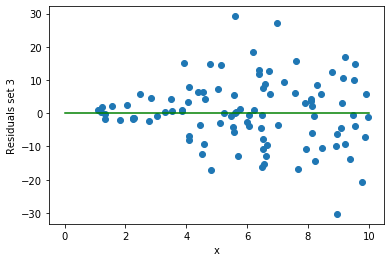

In [68]:
scatter(df_set3["x"], reg_set_3_sqrt_no_int.fittedvalues - df_set3["sqrt_y"])
plt.xlabel("x")
plt.ylabel("Residuals set 3")
plt.plot([0, 10], [0, 0], 'g-')

The fit of transformed data is reasonably good, R2 value is large (0.975), and kurtosis value 3.82 means that residuals are approx. normal and skewness is small. Our model is $$\sqrt{y} = 9.4711 * x$$ or $$y = 89.7 * x^2$$

## Dataset 4

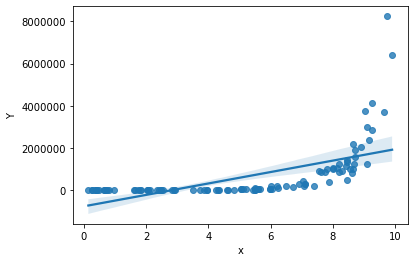

In [69]:
sns.regplot(y="Y", x="x", data=df_set4, fit_reg = True)

In [70]:
reg_set_4 = ols('Y ~ x', data= df_set4).fit()
reg_set_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     59.97
Date:                Tue, 04 Aug 2020   Prob (F-statistic):           8.87e-12
Time:                        17:14:55   Log-Likelihood:                -1526.2
No. Observations:                 100   AIC:                             3056.
Df Residuals:                      98   BIC:                             3062.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.535e+05    2.1e+05     -3.585      0.001   -1.17e+06   -3.36e+05
x           2.707e+05   3.49e+04      7.744      0.000    2.01e+05     3.4e+05
==============================================================================
Omnibus:                      102.143   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1253.666
Skew:                           3.381   Prob(JB):                    5.89e-273
Kurtosis:                      18.973   Cond. No.                         12.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

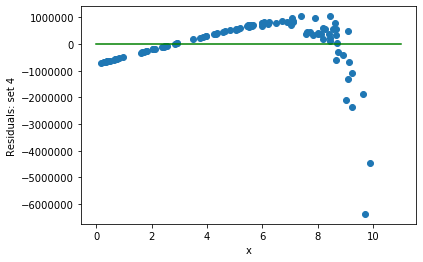

In [71]:
scatter(df_set4["x"], reg_set_4.fittedvalues - df_set4["Y"])
plt.xlabel("x")
plt.ylabel("Residuals: set 4")
plt.plot([0, 11], [0, 0], 'g-')
plt.savefig('first_residuals.png')

The trend is strongly upward, probably exponential.   
The Box-Cox transformation will be used.

In [72]:
boxcox_y4, lambda_4 = scipy.stats.boxcox(df_set4["Y"])
lambda_4

0.04196708711302993

With $\lambda$ value is approximately zero the log-transform may be used.

In [73]:
df_set4["log_y"] = np.log(df_set4["Y"])

In [74]:

reg_set_4_log = ols('log_y ~ x', data=df_set4).fit()
reg_set_4_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  log_y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     5765.
Date:                Tue, 04 Aug 2020   Prob (F-statistic):           6.91e-89
Time:                        17:14:57   Log-Likelihood:                -46.034
No. Observations:                 100   AIC:                             96.07
Df Residuals:                      98   BIC:                             101.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.6647      0.078     72.264      0.000       5.509       5.820
x              0.9898      0.013     75.930      0.000       0.964       1.016
==============================================================================
Omnibus:                        7.020   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                7.256
Skew:                          -0.657   Prob(JB):                       0.0266
Kurtosis:                       2.872   Cond. No.                         12.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

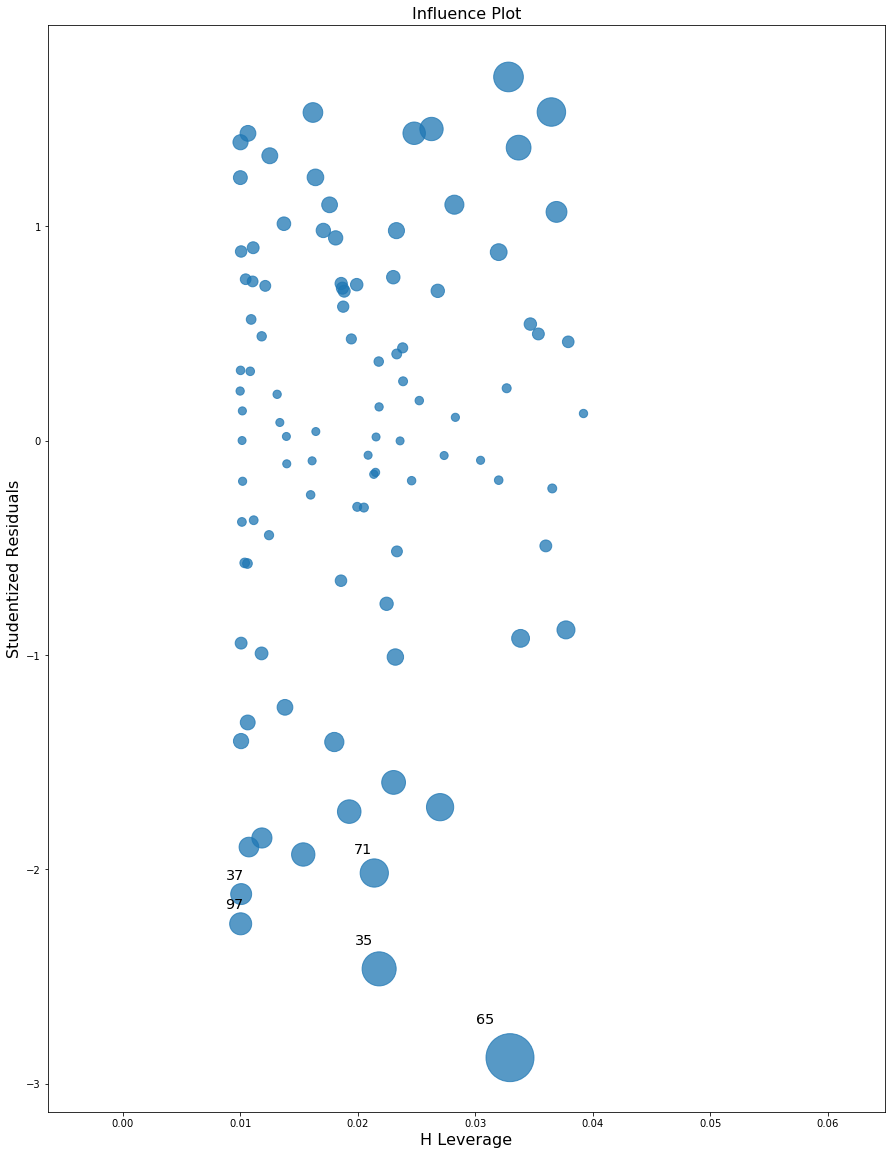

In [75]:
fig, ax = plt.subplots(figsize=(15,20))
fig = sm.graphics.influence_plot(reg_set_4_log, ax=ax, criterion="cooks")

log-transformed data can be fitted nicely into linear model.
R-squared has quite high value (0.983),
kurtosis value is close to 3, skewness is bit large (-0.657) in this model,
but still the residuals are close to normal.

We should keep intercept in our model, P > |t| is 0.000 for Intercept.

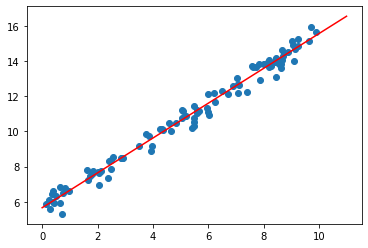

In [76]:
t = np.linspace(0, 11, 100)
plt.scatter(x=df_set4["x"], y=df_set4["log_y"])
plt.plot(t, reg_set_4_log.params[0] + reg_set_4_log.params[1] * t, 'r-')

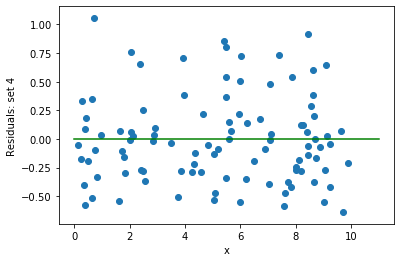

In [77]:
scatter(df_set4["x"], reg_set_4_log.fittedvalues - df_set4["log_y"])
plt.xlabel("x")
plt.ylabel("Residuals: set 4")
plt.plot([0, 11], [0, 0], 'g-')
plt.savefig('second_residuals.png')

Our model is $\log{y} = 5.66 + 0.9898 * x$. The slope can be rounded to 1 and transforming back to y:

The relationship is $y = 287.15 * \exp{(x)}$.

## Dataset 5

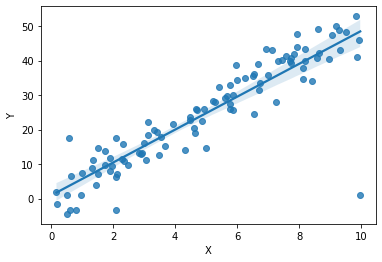

In [78]:
sns.regplot(y="Y", x="X", data=df_set5, fit_reg = True)

There is a linear correlation in this data set. One obvious outlier can be spotted at around x = 10 y = 0.

In [79]:

reg_set_5 = ols('Y ~ X', data=df_set5).fit()
reg_set_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     411.9
Date:                Tue, 04 Aug 2020   Prob (F-statistic):           4.70e-37
Time:                        17:15:00   Log-Likelihood:                -334.42
No. Observations:                 101   AIC:                             672.8
Df Residuals:                      99   BIC:                             678.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9213      1.346      0.685      0.495      -1.749       3.591
X              4.7671      0.235     20.294      0.000       4.301       5.233
==============================================================================
Omnibus:                      113.783   Durbin-Watson:                   1.491
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2578.951
Skew:                          -3.591   Prob(JB):                         0.00
Kurtosis:                      26.691   Cond. No.                         11.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
# Fit suggest that intercept is 0

reg_set_5_no_int = ols('Y ~ X - 1', data=df_set5).fit()
reg_set_5_no_int.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      Y   R-squared (uncentered):                   0.947
Model:                            OLS   Adj. R-squared (uncentered):              0.946
Method:                 Least Squares   F-statistic:                              1787.
Date:                Tue, 04 Aug 2020   Prob (F-statistic):                    1.33e-65
Time:                        17:15:00   Log-Likelihood:                         -334.65
No. Observations:                 101   AIC:                                      671.3
Df Residuals:                     100   BIC:                                      673.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X              4.9068      0.116     42.273      0.000       4.676       5.137
==============================================================================
Omnibus:                      117.055   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2871.474
Skew:                          -3.721   Prob(JB):                         0.00
Kurtosis:                      28.039   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

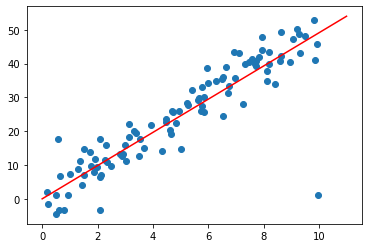

In [81]:
t = np.linspace(0, 11, 100)
plt.scatter(x=df_set5["X"], y=df_set5["Y"])
plt.plot(t, reg_set_5_no_int.params[0] * t, 'r-')

R-squared value is quite good. Residuals distribution is far from normal, large values of kurtosis and skewness. The skew must be due to the outlier.

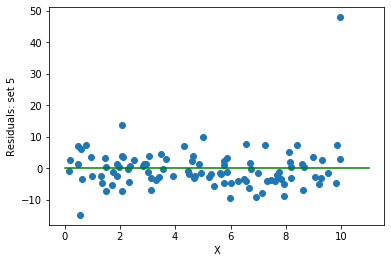

In [82]:
scatter(df_set5["X"], reg_set_5_no_int.fittedvalues - df_set5["Y"])
plt.xlabel("X")
plt.ylabel("Residuals: set 5")
plt.plot([0, 11], [0, 0], 'g-')

R-squared value is quite good. Residuals distribution is far from normal, large values of kurtosis and skewness. The skew must be due to the outlier as most residuals are randomly scattered around zero with constant variability.

Let detect outliers with statsmodels `influence plot`.

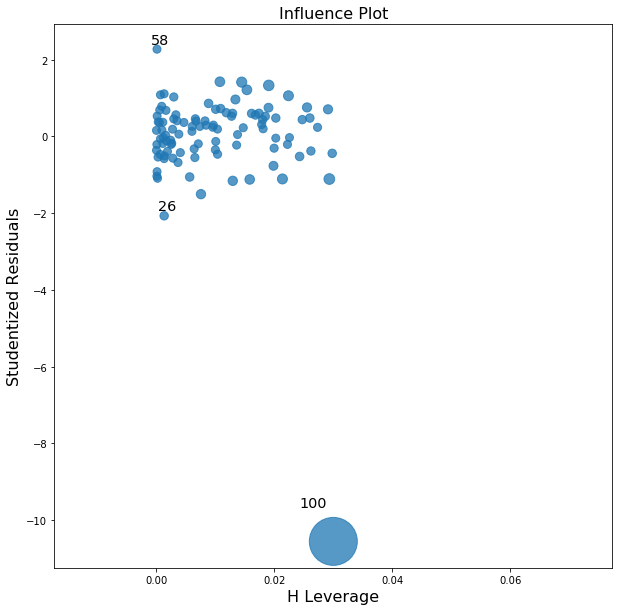

In [83]:
fig, ax = plt.subplots(figsize=(10,10))
fig = sm.graphics.influence_plot(reg_set_5_no_int, ax=ax, criterion="cooks")

Points 26, 58 and 100 were detected as outliers. While points 26 and 58 should have moderate infuence, point 100 is apparently of high influence. Let's build a model without point 100.

In [84]:
df_set5_m = df_set5.drop([100])

In [85]:

reg_set_5_m = ols('Y ~ X - 1', data=df_set5_m).fit()
reg_set_5_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      Y   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              3872.
Date:                Tue, 04 Aug 2020   Prob (F-statistic):                    3.52e-81
Time:                        17:15:03   Log-Likelihood:                         -294.13
No. Observations:                 100   AIC:                                      590.3
Df Residuals:                      99   BIC:                                      592.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X              5.0553      0.081     62.225      0.000       4.894       5.217
==============================================================================
Omnibus:                        2.985   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.225   Jarque-Bera (JB):                2.694
Skew:                          -0.162   Prob(JB):                        0.260
Kurtosis:                       3.736   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This model is quite good. R-squared is very close to 1 and residuals are approx. normal, kurtosis is 3.736 and small skewness. Model might be further improved by removing two other residuals.

## Dataset 6

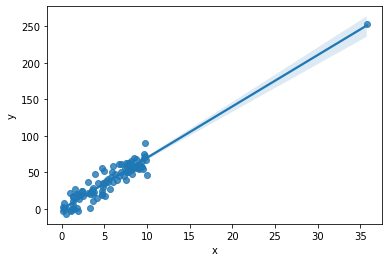

In [86]:
sns.regplot(y="y", x="x", data=df_set6, fit_reg = True)

In [87]:

reg_set_6 = ols('y ~ x', data=df_set6).fit()
reg_set_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     1041.
Date:                Tue, 04 Aug 2020   Prob (F-statistic):           2.49e-54
Time:                        17:15:04   Log-Likelihood:                -367.52
No. Observations:                 101   AIC:                             739.0
Df Residuals:                      99   BIC:                             744.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3059      1.534     -0.199      0.842      -3.350       2.739
x              7.0272      0.218     32.259      0.000       6.595       7.459
==============================================================================
Omnibus:                        0.494   Durbin-Watson:                   2.255
Prob(Omnibus):                  0.781   Jarque-Bera (JB):                0.262
Skew:                           0.120   Prob(JB):                        0.877
Kurtosis:                       3.070   Cond. No.                         11.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Even though there is an outlier in data set, the model is of good quality.
High value of R-squared, kustosis close to 3, small skewness. 
Values of kurtosis and skewness point to normal distribution of residuals.

P>|t| for the intercept is very large and the intercept must be removed from model.

In [88]:
reg_set_6_no_int = ols('y ~ x - 1', data=df_set6).fit()
reg_set_6_no_int.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                              2861.
Date:                Tue, 04 Aug 2020   Prob (F-statistic):                    2.17e-75
Time:                        17:15:04   Log-Likelihood:                         -367.54
No. Observations:                 101   AIC:                                      737.1
Df Residuals:                     100   BIC:                                      739.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x              6.9926      0.131     53.488      0.000       6.733       7.252
==============================================================================
Omnibus:                        0.469   Durbin-Watson:                   2.256
Prob(Omnibus):                  0.791   Jarque-Bera (JB):                0.244
Skew:                           0.116   Prob(JB):                        0.885
Kurtosis:                       3.067   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

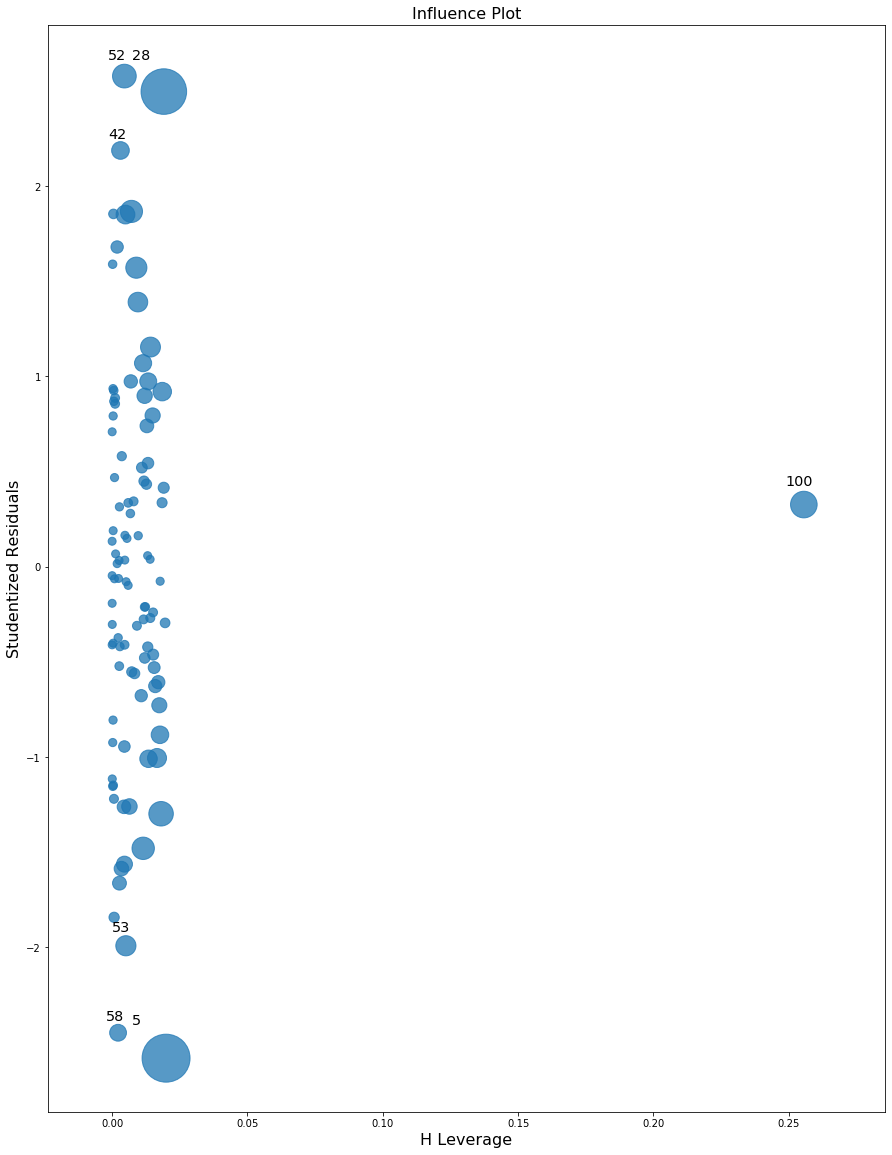

In [89]:
# Let's detect outliers

fig, ax = plt.subplots(figsize=(15,20))
fig = sm.graphics.influence_plot(reg_set_6_no_int, ax=ax, criterion="cooks")

This shows that point 100 is of moderate leverage, while points 5 and 28 are strong influencers.

In [90]:
# Let's remove outliers and build new model

df_set6_m = df_set6.drop([5, 28])

reg_set_6_m = ols('y ~ x - 1', data=df_set6_m).fit()
reg_set_6_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                              3064.
Date:                Tue, 04 Aug 2020   Prob (F-statistic):                    9.68e-76
Time:                        17:15:05   Log-Likelihood:                         -354.93
No. Observations:                  99   AIC:                                      711.9
Df Residuals:                      98   BIC:                                      714.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x              6.9950      0.126     55.351      0.000       6.744       7.246
==============================================================================
Omnibus:                        0.469   Durbin-Watson:                   2.339
Prob(Omnibus):                  0.791   Jarque-Bera (JB):                0.373
Skew:                           0.149   Prob(JB):                        0.830
Kurtosis:                       2.962   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We see tiny improve in our model, R-squared changed from 0.966 to 0.969.
Kurtosis and skewness values indicate normally distributed residulals.
It means that detected outliers are not influencial. The point also can be removed, but it's unlikely that it will improve model. 

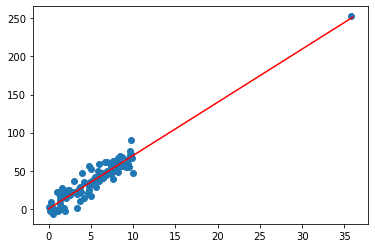

In [91]:
t = np.linspace(0, 36, 100)
plt.scatter(x=df_set6["x"], y=df_set6["y"])
plt.plot(t, reg_set_6_no_int.params[0] * t, 'r-')

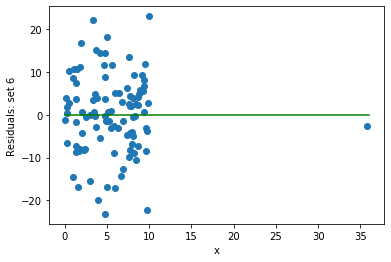

In [92]:
scatter(df_set6["x"], reg_set_6_no_int.fittedvalues - df_set6["y"])
plt.xlabel("x")
plt.ylabel("Residuals: set 6")
plt.plot([0, 36], [0, 0], 'g-')